In [ ]:
# Project-1 : ANALYZING THE NAMING TRENDS USING PYTHON

In [11]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from zipfile import ZipFile 

In [16]:
fileName = "names.zip"
fileName

'names.zip'

In [65]:
 # Reading files in the zip file and printing the total # of files
zipfile = ZipFile(fileName)
filesList = zipfile.namelist()
print(len(filesList))

141


In [66]:
for x in filesList :
  df = pd.read_csv(io.BytesIO(zipfile.read(x)), encoding='utf-8', engine='python', header=None)
  print(df)
  break

              0  1     2
0          Mary  F  7065
1          Anna  F  2604
2          Emma  F  2003
3     Elizabeth  F  1939
4        Minnie  F  1746
...         ... ..   ...
1995     Woodie  M     5
1996     Worthy  M     5
1997     Wright  M     5
1998       York  M     5
1999  Zachariah  M     5

[2000 rows x 3 columns]


In [67]:
# function to return year from "yob1980.txt"
def getYear(textfile):
  year = 0
  str = textfile.split(".")
  if(str[1] == "txt"):
     year = str[0].split("yob")[1]
  return year

In [68]:
#getYear('yob1980.txt')
getYear("NationalReadMe.pdf")

0

In [ ]:
# Visualize the number of male and female babies born in a particular year with the help of
# pandas.DataFrame.plot, then Analyse baby names by sorting out all birth counts.

In [82]:
males = []
females = []
year = []
maleCount = []
femaleCount = []


for x in filesList :
  year1 = getYear(x)
  #print("Year =",year1)
  if(year1 != 0):
    year.append(year1)
    df = pd.read_csv(io.BytesIO(zipfile.read(x)), encoding='utf-8', engine='python', header=None)
    #print(type(df), df.head())
    # print(len(df))
    male = df[(df[1]=='M')]
    female = df[(df[1]=='F')]
    
    maleCount.append(len(male))
    femaleCount.append(len(female))
    males.append(male)
    females.append(female)


In [71]:
 print("Male count :", maleCount) 
 print("Female count :", femaleCount) 
 print("Years :",year) 
 print(len(year)) 

Male count : [1058, 997, 1099, 1030, 1125, 1097, 1110, 1067, 1177, 1111, 1161, 1127, 1260, 1179, 1239, 1241, 1266, 1229, 1289, 1200, 1506, 1210, 1320, 1306, 1395, 1421, 1413, 1549, 1584, 1679, 1839, 1999, 2906, 3261, 3759, 4390, 4534, 4602, 4813, 4810, 4989, 4986, 4967, 4904, 4971, 4867, 4837, 4804, 4722, 4546, 4543, 4320, 4283, 4154, 4206, 4145, 4037, 4019, 4036, 3967, 3936, 4001, 4044, 4040, 3908, 3784, 4020, 4268, 4200, 4203, 4195, 4252, 4256, 4340, 4359, 4396, 4453, 4554, 4502, 4572, 4594, 4652, 4625, 4621, 4593, 4420, 4537, 4550, 4743, 5042, 5430, 5654, 5752, 5876, 6006, 6335, 6491, 6854, 6761, 7070, 7294, 7291, 7368, 7340, 7334, 7584, 7827, 8150, 8491, 9228, 9484, 9648, 9816, 10168, 10245, 10327, 10532, 10811, 11307, 11611, 12118, 12302, 12484, 12756, 13221, 13366, 14040, 14393, 14618, 14529, 14262, 14346, 14242, 14044, 14059, 14039, 14181, 14229, 14062, 14049]
Female count : [942, 938, 1028, 1054, 1172, 1197, 1282, 1306, 1474, 1479, 1534, 1533, 1661, 1652, 1702, 1808, 1825, 1799

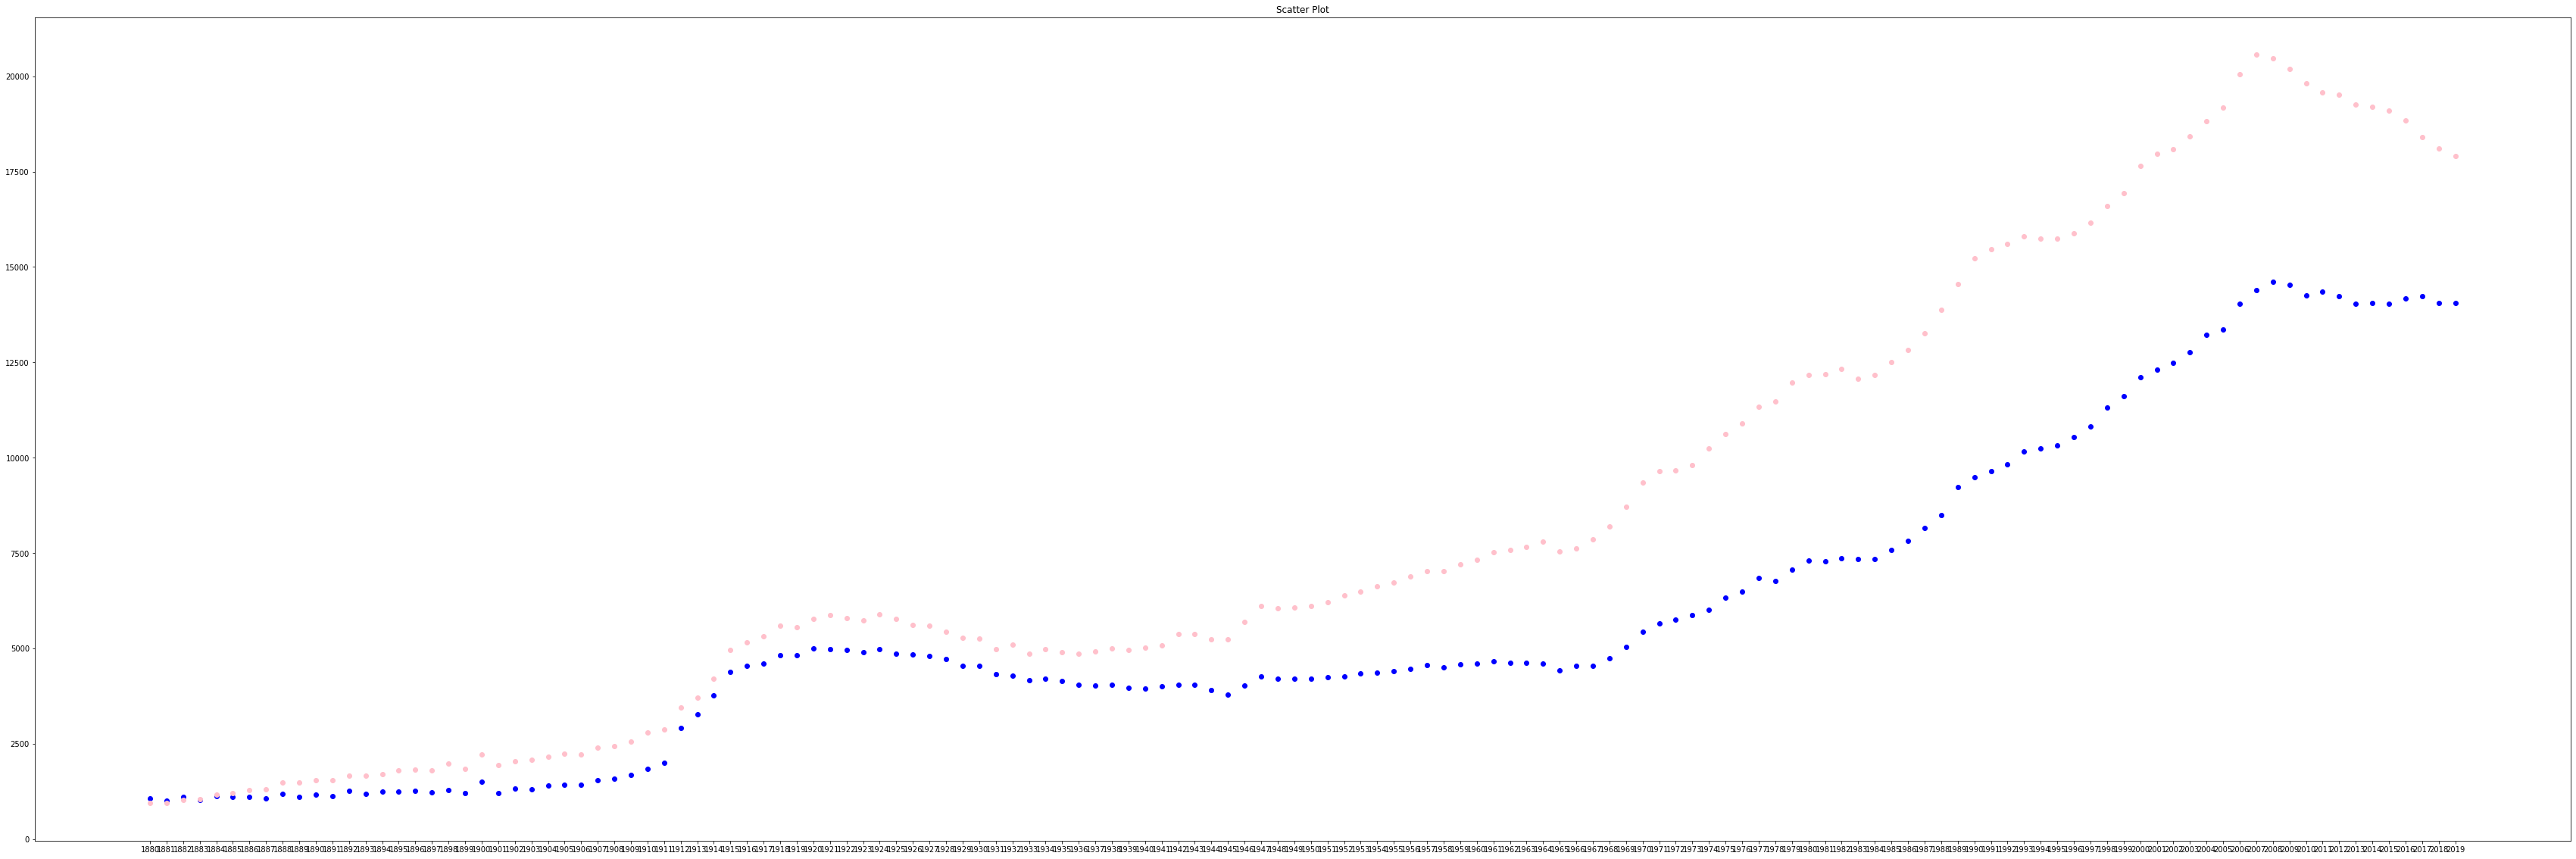

In [73]:
fig = plt.figure(figsize=(60,20))

# Add axes
ax = plt.subplot()
ax.scatter(year, maleCount, c='blue')
ax.scatter(year, femaleCount, c='pink')
plt.title("Scatter Plot")
plt.show()

In [74]:
# Merge values of all dataframes in a list in to single dataframe
mergedMales = pd.concat(males)
print(type(mergedMales))
print(mergedMales)

mergedFemales = pd.concat(females)
print(mergedFemales)

<class 'pandas.core.frame.DataFrame'>
             0  1     2
942       John  M  9655
943    William  M  9532
944      James  M  5927
945    Charles  M  5348
946     George  M  5126
...        ... ..   ...
31949   Zyheem  M     5
31950    Zykel  M     5
31951   Zyking  M     5
31952      Zyn  M     5
31953    Zyran  M     5

[814746 rows x 3 columns]
               0  1     2
0           Mary  F  7065
1           Anna  F  2604
2           Emma  F  2003
3      Elizabeth  F  1939
4         Minnie  F  1746
...          ... ..   ...
17900      Zymia  F     5
17901    Zymirah  F     5
17902       Zyna  F     5
17903     Zynlee  F     5
17904   Zyrielle  F     5

[1174655 rows x 3 columns]


In [76]:
# Analyse baby names by sorting out all birth counts.

sortMales = mergedMales.sort_values(by = [2], ascending = False)
sortFemales = mergedFemales.sort_values(by = [2], ascending = False)

print("Male names based on birth counts : \n",sortMales.head(100))
print("\nFemale names based on birth counts : \n",sortFemales.head(100))

Male names based on birth counts : 
             0  1      2
6103    James  M  94766
7014  Michael  M  92726
6104   Robert  M  91645
6886  Michael  M  90662
7024  Michael  M  90531
...       ... ..    ...
7667    James  M  71328
5245   Robert  M  70849
7590   Robert  M  70195
7809   Robert  M  70011
7668   Robert  M  70010

[100 rows x 3 columns]

Female names based on birth counts : 
            0  1      2
0      Linda  F  99690
0      Linda  F  96213
0      Linda  F  91019
0      Linda  F  80433
0       Mary  F  73985
..       ... ..    ...
2      Linda  F  48072
2   Patricia  F  47944
0    Jessica  F  47887
3    Deborah  F  47832
0       Mary  F  47680

[100 rows x 3 columns]


In [78]:
# Analyse baby names by sorting out top 100 birth counts and group them by names to find
# out popular baby names

topM100 = sortMales.head(100)
topF100 = sortFemales.head(100)

print("Top Male Names :\n",topM100)
print("Top Female Names :\n",topF100)

Top Male Names :
             0  1      2
6103    James  M  94766
7014  Michael  M  92726
6104   Robert  M  91645
6886  Michael  M  90662
7024  Michael  M  90531
...       ... ..    ...
7667    James  M  71328
5245   Robert  M  70849
7590   Robert  M  70195
7809   Robert  M  70011
7668   Robert  M  70010

[100 rows x 3 columns]
Top Female Names :
            0  1      2
0      Linda  F  99690
0      Linda  F  96213
0      Linda  F  91019
0      Linda  F  80433
0       Mary  F  73985
..       ... ..    ...
2      Linda  F  48072
2   Patricia  F  47944
0    Jessica  F  47887
3    Deborah  F  47832
0       Mary  F  47680

[100 rows x 3 columns]


In [81]:
grMNames = topM100.groupby(0)
grFNames = topF100.groupby(0)

print("Popular Male Names : \n",grMNames.first(10))
print("\n Popular Female Names : \n",grFNames.first(10))

Popular Male Names : 
              2
0             
David    86285
James    94766
John     88320
Michael  92726
Robert   91645

 Popular Female Names : 
               2
0              
Ashley    54853
Barbara   48793
Deborah   54683
Debra     50563
Jennifer  63602
Jessica   55992
Linda     99690
Lisa      60269
Mary      73985
Patricia  56442
